# Problem Description
**URL:**  
https://www.drivendata.org/competitions/66/flu-shot-learning/
**Challenge description:**  
This challenge uses survey data to predict whether individuals receive H1N1 or seasonal flu vaccines. The features include respondents’ social, economic, and demographic backgrounds; their opinions on risk of illness and vaccine effectiveness; and their behaviors toward mitigating transmission. There are both numerical and categorical variables (e.g., race, education, occupation).

**Datapoint definition:**  
Each datapoint is one survey respondent’s full record of demographics, opinions, and behaviors.

**Outcome variable:**  
Binary indicators for whether the respondent was vaccinated or unvaccinated against H1N1 and against seasonal flu.

# Dataset Description
- **Number of examples:** ~26,700  
- **Number of features:** 35  
- I do believe that we may need a feature reduction technique in a supervised ML approach, since there are considerably more examples compared to the features with both together making a incredibly huge dataset. However, overall, the data set has a moderate dataset compared to the size of the data points so, we may be amply sampling the region. 

**How the dataset is provided:**  
The data is provided on thier site and is divided into the following categories: 
- Submission Format
- Training set features.
- Labels for the training set.
- Test set features.

**Stated file size:**  
- The website only provides the link not how big the file is. 

# Data Gathering and processing;

**Downloading the data diretly from the website** 

The data was downloaded directly from the challenge site site:  

In [63]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gffutils
import pyfaidx

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn import svm
from sklearn.metrics import *

In [64]:
# Loading the Dataset as a Dataframe
import pandas as pd
df = pd.read_csv('training_set_features.csv')
df_t = pd.read_csv('test_set_features.csv') 
labels = pd.read_csv('training_set_labels.csv')



# merging the df and labels into one combined data set by matching to the common column and keeping those that match for both data frames
data = df.merge(labels, on='respondent_id', how='inner')
data_t = df_t.merge(labels, on='respondent_id', how='inner')
print(df.shape)
df.head()

(26707, 36)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [65]:
df_t.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


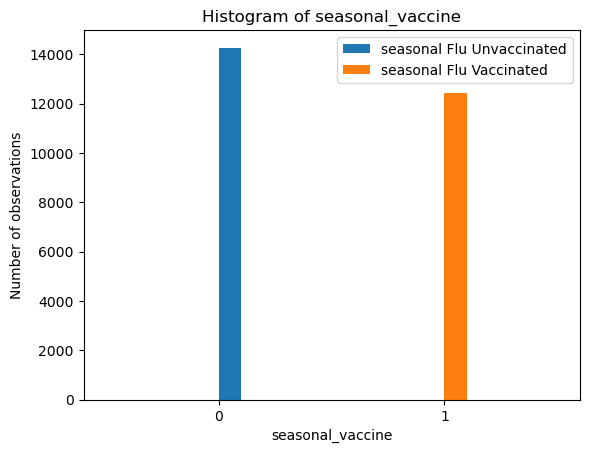

In [66]:
# Plotting a Histogram to show the class distribution of the patients sealsonal vaccine status

feature_name = "seasonal_vaccine" # Column Name for the outcome var
# subesting based on outcome: 
class_1_feat = data[data["seasonal_vaccine"] == 0][feature_name] 
class_2_feat = data[data["seasonal_vaccine"] == 1][feature_name]

class_1_name = "seasonal Flu Unvaccinated"
class_2_name = "seasonal Flu Vaccinated"

plt.hist(class_1_feat, label=class_1_name)
plt.hist(class_2_feat, label=class_2_name)

plt.legend(loc='upper right')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Number of observations")
plt.xticks([0,1])
plt.show()

## Preping the data to take care of missing value: 

In [67]:
# looking the number of NA values in the data set: 
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [181]:
# We can see that there are certain features that have really high number of missing values,
# Since we onle have ~27000 feature, I think dropping any columns that have more than 10000 missing values
# should be dropped, and for the others I will remove those rows. 

na_counts = df.isnull().sum()
cols_d = na_counts[ na_counts > 100000].index.tolist()

df2= df.drop(columns=cols_d)
org_dp = df2.shape[0]
df2


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg


In [182]:
# now removing the rows with na 
df2= df2.dropna()
drop_dp = df2.shape[0]
print (f" {org_dp-drop_dp}, is the numeber for data points that were removed")


 20270, is the numeber for data points that were removed


In [183]:
# Now we can drop those same rows from the labels dataframe: 
labels2 = labels[labels['respondent_id'].isin(df2['respondent_id'])]


**We can see that the there is not a vast class difference for seasonal flu vaccinated individuals. We will now further analyse the data to look for categorical features and making them numerical.**

In [184]:
# Splitting the Dataframe for categorical features:
categorical = df2.select_dtypes(include=['object','category']).columns.tolist()
df2[categorical]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",pxcmvdjn,xgwztkwe
7,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,bhuqouqj,Non-MSA,pxcmvdjn,xqwwgdyp
10,45 - 54 Years,12 Years,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,lzgpxyit,"MSA, Not Principle City",xicduogh,qxajmpny
11,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,oxchjgsf,Non-MSA,xicduogh,ccgxvspp
15,35 - 44 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",wxleyezf,emcorrxb
...,...,...,...,...,...,...,...,...,...,...,...,...
26681,18 - 34 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lrircsnp,"MSA, Not Principle City",arjwrbjb,bxpfxfdn
26683,55 - 64 Years,College Graduate,White,Female,"> $75,000",Married,Own,Employed,fpwskwrf,"MSA, Not Principle City",fcxhlnwr,cmhcxjea
26690,45 - 54 Years,College Graduate,Hispanic,Female,"<= $75,000, Above Poverty",Married,Own,Employed,mlyzmhmf,"MSA, Principle City",mcubkhph,oijqvulv
26699,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",pxcmvdjn,xgwztkwe


In [185]:
# We can see that there are 12 features which are categorical, lets see the categories for each: 
for col in categorical:
    cats = df2[col].dropna().unique()
    print(f"{col}:, {cats} ") 

age_group:, ['35 - 44 Years' '45 - 54 Years' '55 - 64 Years' '18 - 34 Years'
 '65+ Years'] 
education:, ['12 Years' 'Some College' 'College Graduate' '< 12 Years'] 
race:, ['White' 'Black' 'Other or Multiple' 'Hispanic'] 
sex:, ['Male' 'Female'] 
income_poverty:, ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000'] 
marital_status:, ['Not Married' 'Married'] 
rent_or_own:, ['Rent' 'Own'] 
employment_status:, ['Employed'] 
hhs_geo_region:, ['bhuqouqj' 'lzgpxyit' 'oxchjgsf' 'qufhixun' 'fpwskwrf' 'mlyzmhmf'
 'dqpwygqj' 'kbazzjca' 'atmpeygn' 'lrircsnp'] 
census_msa:, ['MSA, Not Principle  City' 'Non-MSA' 'MSA, Principle City'] 
employment_industry:, ['pxcmvdjn' 'xicduogh' 'wxleyezf' 'rucpziij' 'ldnlellj' 'fcxhlnwr'
 'vjjrobsf' 'arjwrbjb' 'xqicxuve' 'wlfvacwt' 'phxvnwax' 'cfqqtusy'
 'mcubkhph' 'saaquncn' 'mfikgejo' 'atmlpfrs' 'haxffmxo' 'nduyfdeo'
 'qnlwzans' 'dotnnunm' 'msuufmds'] 
employment_occupation:, ['xgwztkwe' 'xqwwgdyp' 'qxajmpny' 'ccgxvspp' 'emcorrxb' 'xtkaffoo'
 'mxkfnird' '

In [186]:
# making a dictionary for the categorical feturues:
cat_df ={}
for col in categorical:
    cats = df2[col].dropna().unique()
    cat_df[col]=cats
cat_df

{'age_group': array(['35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '18 - 34 Years',
        '65+ Years'], dtype=object),
 'education': array(['12 Years', 'Some College', 'College Graduate', '< 12 Years'],
       dtype=object),
 'race': array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object),
 'sex': array(['Male', 'Female'], dtype=object),
 'income_poverty': array(['Below Poverty', '<= $75,000, Above Poverty', '> $75,000'],
       dtype=object),
 'marital_status': array(['Not Married', 'Married'], dtype=object),
 'rent_or_own': array(['Rent', 'Own'], dtype=object),
 'employment_status': array(['Employed'], dtype=object),
 'hhs_geo_region': array(['bhuqouqj', 'lzgpxyit', 'oxchjgsf', 'qufhixun', 'fpwskwrf',
        'mlyzmhmf', 'dqpwygqj', 'kbazzjca', 'atmpeygn', 'lrircsnp'],
       dtype=object),
 'census_msa': array(['MSA, Not Principle  City', 'Non-MSA', 'MSA, Principle City'],
       dtype=object),
 'employment_industry': array(['pxcmvdjn', 'xicduogh', 'wxleyezf'

In [187]:
# now we will covert these categories to numbers by assigning them number in asscending order for thier respective order in the df above, using it a mapping index

for col in cat_df: 
    encoder = OrdinalEncoder(categories=[cat_df[col]])
    df2[col] = encoder.fit_transform(df2[[col]])
df2

/var/folders/k_/t5gl11yd5496_djwn7shkqrm0000gn/T/ipykernel_72796/1565084309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[[col]])
/var/folders/k_/t5gl11yd5496_djwn7shkqrm0000gn/T/ipykernel_72796/1565084309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = encoder.fit_transform(df2[[col]])
/var/folders/k_/t5gl11yd5496_djwn7shkqrm0000gn/T/ipykernel_72796/1565084309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,2.0
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,1.0,3.0
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,9.0,0.0,1.0,0.0,7.0,7.0
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,1.0,1.0,0.0,4.0,0.0,1.0,0.0,5.0,8.0
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,5.0,2.0,2.0,1.0,12.0,10.0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0


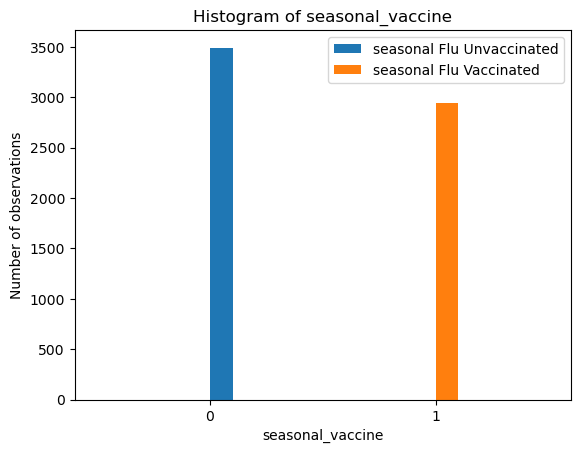

In [188]:
# Plotting a Histogram to show the class distribution of the patients sealsonal vaccine status after the categorical features have been converted to numbers

feature_name = "seasonal_vaccine" # Column Name for the outcome var
# subesting based on outcome: 
class_1_feat = labels2[labels2["seasonal_vaccine"] == 0][feature_name] 
class_2_feat = labels2[labels2["seasonal_vaccine"] == 1][feature_name]
class_1_name = "seasonal Flu Unvaccinated"
class_2_name = "seasonal Flu Vaccinated"

plt.hist(class_1_feat, label=class_1_name)
plt.hist(class_2_feat, label=class_2_name)

plt.legend(loc='upper right')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Number of observations")
plt.xticks([0,1])
plt.show()

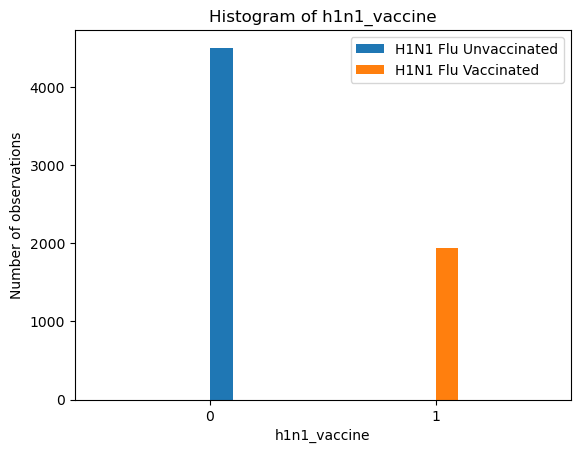

In [189]:
# Plotting a Histogram to show the class distribution of the patients sealsonal vaccine status after the categorical features have been converted to numbers

feature_name = "h1n1_vaccine" # Column Name for the outcome var
# subesting based on outcome: 
class_1_feat = labels2[labels2["h1n1_vaccine"] == 0][feature_name] 
class_2_feat = labels2[labels2["h1n1_vaccine"] == 1][feature_name]
class_1_name = "H1N1 Flu Unvaccinated"
class_2_name = "H1N1 Flu Vaccinated"

plt.hist(class_1_feat, label=class_1_name)
plt.hist(class_2_feat, label=class_2_name)

plt.legend(loc='upper right')
plt.title(f"Histogram of {feature_name}")
plt.xlabel(f"{feature_name}")
plt.ylabel("Number of observations")
plt.xticks([0,1])
plt.show()

# Splitting the data 

### Since the data provided to us has already been split in a test set and training set, I decide to train on the training set by considering it the crossvalidation set

In [190]:
# manually creating the class and dataframe sepration for the crossvalidation set 
df_crossval = df2.copy()
class_crossval = labels2["seasonal_vaccine"].copy()

# Copying the now crossvalidation dataframe and replacing the index
df_crossval.reset_index(inplace = True)
class_crossval = class_crossval.reset_index()




# Begining SVM Model Building

In [191]:
# Preparing data for crossvalidation: 
n_partitions = 5
skf = StratifiedKFold(n_splits = n_partitions)


# Split into crossvalidation sets (sets of indices in df_crossval and class_crossval)
#  and print out the resulting partition compositions for each partition as
y = class_crossval["seasonal_vaccine"]  # This line is needed for the np.bincount function to work
for train, test in skf.split(df_crossval, y):
    print(f"train : {np.bincount(y[train])} | test : {np.bincount(y[test])}")

train : [2793 2356] | test : [698 590]
train : [2792 2357] | test : [699 589]
train : [2793 2357] | test : [698 589]
train : [2793 2357] | test : [698 589]
train : [2793 2357] | test : [698 589]


In [192]:
# Applying Logistic Regression to the data
model_lr = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)

scores = cross_validate(model_lr, df_crossval, class_crossval["seasonal_vaccine"], cv=skf,
    scoring=('accuracy', 'precision'),
    return_train_score=True)

In [193]:
# Applying SVM Classifier 
#clf = svm.SVC(kernel='linear', C=1, random_state=42)  # define classifier
#scores = cross_validate(clf, df_crossval, class_crossval["seasonal_vaccine"], cv=skf,
    #scoring=('accuracy', 'precision'),
   # return_train_score=True)

In [194]:
# Examine results
scores

# Nicer printing of specific performance metrics across partitions
scores_train_acc = scores["train_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

scores_train_acc = scores["test_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

78.73%, 79.53%, 78.8%, 79.05%, 79.11%
79.74%, 77.8%, 79.64%, 78.79%, 78.24%


In [195]:
# Prepare for final model training and evaluation
df_crossval = df_crossval.set_index("index") # remove explicit index column and reset indices to the original dataset indices
class_crossval = class_crossval.set_index("index") # remove explicit index column and reset indices to the original dataset indices

In [196]:
#clf_final = svm.SVC(kernel='linear', C=1, random_state=42)  # define classifier

#final_model = clf_final.fit(df_crossval, class_crossval['seasonal_vaccine']) # train model


In [197]:
clf_final = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)
  # define classifier

final_model = clf_final.fit(df_crossval, class_crossval['seasonal_vaccine']) # train model


In [198]:
# Before we do predictions on the Test Set, we need to do the same preprocessing steps as above, 
# Removing columns that are not in the training set, 
df_t2 = pd.DataFrame()
for col in df_t.columns: 
    if col in df2.columns: 
        df_t2[col] = df_t[col]
# Now removing any rows with NA values: 
df_t2 = df_t2.dropna()

# Now mapping the categorical features to numbers 
for col in cat_df: 
    encoder = OrdinalEncoder(categories=[cat_df[col]])
    df_t2[col] = encoder.fit_transform(df_t2[[col]])


df_t2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,2.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,15.0,9.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,15.0,1.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,6.0
5,26712,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,2.0,0.0,1.0,0.0,5.0,2.0,0.0,2.0,5.0,8.0
11,26718,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,7.0,9.0


In [199]:
pred_train = final_model.predict(df_crossval) # predict class labels for the training set
pred_test = final_model.predict(df_t2) # predict class labels for the independent test set


In [200]:
# Evaluate final model performance

accuracy_score(pred_train, class_crossval) # accuracy in training
#accuracy_score(pred_test, class_test) # accuracy in testing


0.7908963803013827

In [201]:
confusion_matrix(pred_train, class_crossval) # confusion matrix in training
#confusion_matrix(pred_test, class_test) # confusion matrix in testing

array([[2897,  752],
       [ 594, 2194]])

# Repeat the modeling for H1N1 


In [202]:
# manually creating the class and dataframe sepration for the crossvalidation set 
df_crossval2 = df2.copy()
class_crossval2 = labels2["h1n1_vaccine"].copy()

# Copying the now crossvalidation dataframe and replacing the index
df_crossval2.reset_index(inplace = True)
class_crossval2 = class_crossval2.reset_index()

In [203]:
# Preparing data for crossvalidation: 
n_partitions = 5
skf = StratifiedKFold(n_splits = n_partitions)


# Split into crossvalidation sets (sets of indices in df_crossval and class_crossval)
#  and print out the resulting partition compositions for each partition as
y = class_crossval2["h1n1_vaccine"]  # This line is needed for the np.bincount function to work
for train, test in skf.split(df_crossval2, y):
    print(f"train : {np.bincount(y[train])} | test : {np.bincount(y[test])}")

train : [3601 1548] | test : [901 387]
train : [3601 1548] | test : [901 387]
train : [3602 1548] | test : [900 387]
train : [3602 1548] | test : [900 387]
train : [3602 1548] | test : [900 387]


In [204]:
# Applying Logistic Regression to the data
model_lr2 = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)

scores2 = cross_validate(model_lr2, df_crossval2, class_crossval2["h1n1_vaccine"], cv=skf,
    scoring=('accuracy', 'precision'),
    return_train_score=True)

In [205]:
# Examine results
scores2

# Nicer printing of specific performance metrics across partitions
scores_train_acc = scores2["train_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

scores_train_acc = scores2["test_accuracy"]
print('%, '.join([str(round(100*x, 2)) for x in scores_train_acc]) + '%')

82.19%, 82.75%, 82.83%, 82.43%, 82.82%
81.13%, 82.22%, 82.52%, 83.68%, 82.52%


In [206]:
# Prepare for final model training and evaluation
df_crossval2 = df_crossval2.set_index("index") # remove explicit index column and reset indices to the original dataset indices
class_crossval2 = class_crossval2.set_index("index") # remove explicit index column and reset indices to the original dataset indices

In [207]:
clf_final = LogisticRegression(penalty="l1", solver="liblinear", random_state=42, max_iter=1000)
  # define classifier

final_model2 = clf_final.fit(df_crossval2, class_crossval2['h1n1_vaccine']) # train model


In [208]:
# Before we do predictions on the Test Set, we need to do the same preprocessing steps as above, 
# Removing columns that are not in the training set, 
df_t2 = pd.DataFrame()
for col in df_t.columns: 
    if col in df2.columns: 
        df_t2[col] = df_t[col]
# Now removing any rows with NA values: 
df_t2 = df_t2.dropna()

# Now mapping the categorical features to numbers 
for col in cat_df: 
    encoder = OrdinalEncoder(categories=[cat_df[col]])
    df_t2[col] = encoder.fit_transform(df_t2[[col]])


df_t2.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,2.0,0.0,0.0,0.0,5.0,0.0,1.0,0.0,15.0,9.0
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,15.0,1.0
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,5.0,6.0
5,26712,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,2.0,0.0,1.0,0.0,5.0,2.0,0.0,2.0,5.0,8.0
11,26718,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,1.0,0.0,4.0,2.0,0.0,0.0,7.0,9.0


In [209]:
pred_train2 = final_model2.predict(df_crossval2) # predict class labels for the training set
pred_test2 = final_model2.predict(df_t2) # predict class labels for the independent test set


In [210]:
# Evaluate final model performance

accuracy_score(pred_train2, class_crossval2) # accuracy in training
#accuracy_score(pred_test, class_test) # accuracy in testing


0.8286468851949667

In [211]:
confusion_matrix(pred_train2, class_crossval2) # confusion matrix in training
#confusion_matrix(pred_test, class_test) # confusion matrix in testing

array([[4137,  738],
       [ 365, 1197]])

### Since We don't get Class_test (Ground Truth for the test set), we will just output the predicted_test values in a csv. 


In [212]:
pred_test_df = pd.DataFrame()
test_id= df_t2['respondent_id']
pred_test_df['respondent_id'] = test_id
pred_test_df['h1n1_vaccine']= pred_test2
pred_test_df['seasonal_vaccine'] = pred_test
pred_test_df
pred_test_df.to_csv('predictions_LR_full.csv', index=False)
